# Лабораторна робота №2
## виконав 
## Жорник Данило 
## студент групи КН-223с


In [2]:
N = ( 6 + 4 ) % 5 + 1
print(N)

1


## Варіант 1
### Завдання 1, 2, 3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 26



### Завдання 1
Виведіть перші 8 рядків набору даних.

In [2]:
import pandas as pd

df = pd.read_csv('NationalNames.csv')
print(df.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414



### Завдання 2
Вивести останні 8 рядків набору даних.

In [14]:
print(df.tail(8))

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5



### Завдання 3
Отримайте імена стовпців набору даних

In [15]:
print(df.columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')



### Завдання 5
Знайдіть кількість унікальних імен у наборі даних

In [16]:
unique_names_count = df['Name'].nunique()
print(f"Кількість унікальних імен: {unique_names_count}")

Кількість унікальних імен: 93889



### Завдання 10
Підрахуйте кількість унікальних імен у кожному році


In [17]:
unique_names_per_year = df.groupby('Year')['Name'].nunique()
result_df = unique_names_per_year.reset_index(name='Unique Names')
print(result_df)

     Year  Unique Names
0    1880          1889
1    1881          1830
2    1882          2012
3    1883          1962
4    1884          2158
..    ...           ...
130  2010         31603
131  2011         31418
132  2012         31236
133  2013         30774
134  2014         30579

[135 rows x 2 columns]



### Завдання 11
Знайдіть рік із найбільшою кількістю унікальних імен.


In [18]:
unique_names_per_year = df.groupby('Year')['Name'].nunique()
year_with_most_unique_names = unique_names_per_year.idxmax()  # Отримуємо рік
print(f"Рік із найбільшою кількістю унікальних імен: {year_with_most_unique_names}")

Рік із найбільшою кількістю унікальних імен: 2008



### Завдання 12
Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних 
імен (тобто у 2008 році)

In [19]:
most_popular_name = df[df['Year'] == year_with_most_unique_names].groupby('Name')['Count'].sum().idxmax()
print(f"Найпопулярніше ім'я у {year_with_most_unique_names} році: {most_popular_name}")

Найпопулярніше ім'я у 2008 році: Jacob



### Завдання 13
Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих 
імен

In [20]:
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
year_jacob_female_most_popular = jacob_female.groupby('Year')['Count'].sum().idxmax()
print(f"Рік, коли ім'я Jacob було найпопулярнішим серед дівчат: {year_jacob_female_most_popular}")

Рік, коли ім'я Jacob було найпопулярнішим серед дівчат: 2004



### Завдання 14
Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові 
чоловічі та жіночі імена)


In [12]:
name_gender_count = df.groupby(['Year', 'Name', 'Gender']).size().unstack(fill_value=0)
neutral_names_per_year = name_gender_count[(name_gender_count['M'] > 0) & (name_gender_count['F'] > 0)]
neutral_names_count_per_year = neutral_names_per_year.groupby(level=0).size()
year_with_most_neutral_names = neutral_names_count_per_year.idxmax()
max_neutral_names_count = neutral_names_count_per_year.max()
print(f"Рік з найбільшою кількістю нейтральних імен: {year_with_most_neutral_names}, Кількість: {max_neutral_names_count}")

Рік з найбільшою кількістю нейтральних імен: 2008, Кількість: 2557



### Завдання 15
Знайдіть загальну кількість народжень за рік

In [3]:
total_births_per_year = df.groupby('Year')['Count'].sum()
total_births_df = total_births_per_year.reset_index(name='Total Births')
print(total_births_df)

     Year  Total Births
0    1880        201484
1    1881        192699
2    1882        221538
3    1883        216950
4    1884        243467
..    ...           ...
130  2010       3686589
131  2011       3646730
132  2012       3643336
133  2013       3626802
134  2014       3670151

[135 rows x 2 columns]



### Завдання 16
Знайдіть рік, коли народилося найбільше дітей


In [4]:
year_with_most_births = total_births_per_year.idxmax()
print(f"Рік з найбільшою кількістю народжень: {year_with_most_births}")

Рік з найбільшою кількістю народжень: 1957



### Завдання 17
Знайдіть кількість дівчаток та хлопчиків, які народились кожного року

In [5]:
gender_count_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print(gender_count_per_year)

Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]



### Завдання 18
Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж 
хлопчиків.

In [6]:
years_more_girls_than_boys = (gender_count_per_year['F'] > gender_count_per_year['M']).sum()
print(f"Кількість років, коли народжувалось більше дівчаток ніж хлопчиків: {years_more_girls_than_boys}")

Кількість років, коли народжувалось більше дівчаток ніж хлопчиків: 54



### Завдання 21
Порахуйте, скільки разів хлопчиків називали Barbara

In [7]:
barbara_boys_count = df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum()
print(f"Хлопчиків, яких назвали Barbara: {barbara_boys_count}")

Хлопчиків, яких назвали Barbara: 4139



### Завдання 22
Підрахуйте скільки років проводилось спостереження


In [8]:
observation_years = df['Year'].nunique()
print(f"Кількість років спостереження: {observation_years}")

Кількість років спостереження: 135



### Завдання 23
Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні 
кожного року)


In [17]:
# Групуємо дані за роком і ім'ям, щоб отримати кількість появ для кожного імені в кожному році по статям
name_gender_count = df.groupby(['Year', 'Name', 'Gender']).size().unstack(fill_value=0)

# Фільтруємо ті імена, які зустрічаються як для чоловіків ('M'), так і для жінок ('F') в одному році
neutral_names_per_year = name_gender_count[(name_gender_count['M'] > 0) & (name_gender_count['F'] > 0)]

# Перетворюємо результат у список унікальних нейтральних імен
neutral_names = neutral_names_per_year.index.get_level_values('Name').unique()

# Підраховуємо загальну кількість появ для кожного нейтрального імені
neutral_names_count = df[df['Name'].isin(neutral_names)].groupby('Name')['Count'].sum().reset_index()

# Перевіряємо, які імена присутні в кожному році
total_years = df['Year'].nunique()
names_in_all_years = df.groupby('Name')['Year'].nunique()  # Кількість років для кожного імені
neutral_names_in_all_years = names_in_all_years[names_in_all_years == total_years].index.tolist()  # Імена, які присутні у всіх роках

# Фільтруємо результати, щоб включити тільки ті імена, які присутні в кожному році
final_neutral_names_count = neutral_names_count[neutral_names_count['Name'].isin(neutral_names_in_all_years)]

# Сортуємо за кількістю у порядку спадання
neutral_names_sorted = final_neutral_names_count.sort_values(by='Count', ascending=False)

# Виводимо результат
print("Найпопулярніші гендерно-нейтральні імена, присутні у кожному році, в порядку спадання:")
print(neutral_names_sorted)


Найпопулярніші гендерно-нейтральні імена, присутні у кожному році, в порядку спадання:
         Name    Count
3710    James  5129096
4100     John  5106590
7081   Robert  4816785
5991  Michael  4330805
5807     Mary  4130441
...       ...      ...
1609   Christ     3686
6299   Nevada     3461
6727    Price     3386
5308     Levy     3116
7421     Sena     2694

[823 rows x 2 columns]



### Завдання 24
Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, 
яким називали дітей найбільшу кількість разів )



In [10]:
unpopular_names = df.groupby('Name')['Count'].sum().nsmallest(10).index.tolist()
most_popular_among_unpopular = df[df['Name'].isin(unpopular_names)].groupby('Name')['Count'].sum().idxmax()
print(f"Найпопулярніше серед непопулярних імен: {most_popular_among_unpopular}")

Найпопулярніше серед непопулярних імен: Aabid



### Завдання 26
Побудувати графіки розподілення кількості жіночих імен John та 
чоловічих імен Mary по роках.

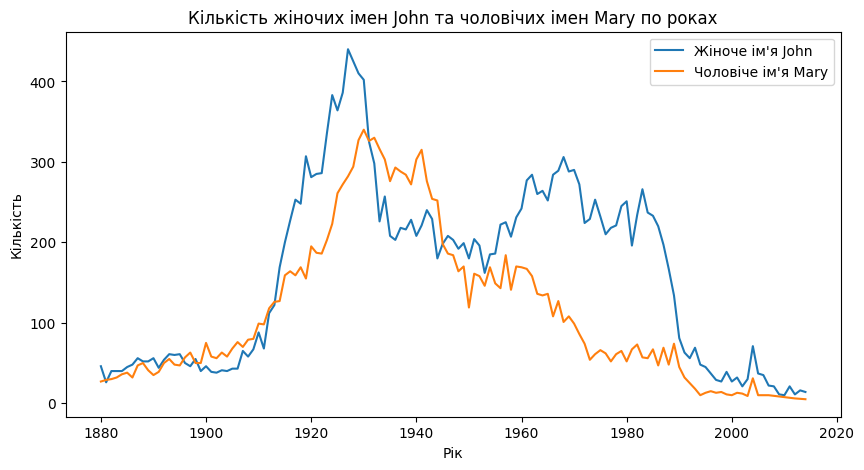

In [11]:
import matplotlib.pyplot as plt

john_female = df[(df['Name'] == 'John') & (df['Gender'] == 'F')].groupby('Year')['Count'].sum()
mary_male = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 5))
plt.plot(john_female.index, john_female.values, label='Жіноче ім\'я John')
plt.plot(mary_male.index, mary_male.values, label='Чоловіче ім\'я Mary')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.title('Кількість жіночих імен John та чоловічих імен Mary по роках')
plt.legend()
plt.show()